In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sklearn

sns.set_style()
pd.options.mode.chained_assignment = None  # default='warn'

# Data science finance dojo - Bonds

In [46]:
df = pd.read_csv('BondsForDataScienceCodingDojo.csv')

In [47]:
df.head()

,Cusip,ISIN,Description,Ticker,Coupon,Maturity,Composite Rating,Currency,Country,Sector Level 1,...,Prior Month-End Yield To Worst,Prior Month-End Effective Duration,Prior Month-End Effective Yield,Prior Month-End OAS vs Govt,TRR % MTD LOC,Excess Rtn % MTD,Asset Swap Spread,Prior Month-End Asset Swap Spread,OAS vs Swap,Prior Month-End OAS vs Swap
0,'AL319313',XS1529687870,AA Bond Co Limited,AABOND,2.875,1/31/2022,BBB3,GBP,GB,Securitized/Collateralized,...,4.221,3.266,4.221,331.0,0.184,0.068,235.0,285.0,243.0,294.0
1,'AO236287',XS1645315620,AA Bond Co Limited,AABOND,2.750,7/31/2023,BBB3,GBP,GB,Securitized/Collateralized,...,4.254,4.604,4.204,318.0,0.207,0.071,267.0,267.0,282.0,282.0
2,'AT538379',XS1856940462,AA Bond Co Limited,AABOND,4.875,7/31/2024,BBB3,GBP,GB,Securitized/Collateralized,...,4.688,5.168,4.688,360.0,0.193,0.042,323.0,323.0,327.0,327.0
3,'EJ733791',XS0949169923,AA Bond Co Limited,AABOND,6.269,7/31/2025,BBB3,GBP,GB,Securitized/Collateralized,...,4.705,5.728,4.705,354.0,0.273,0.107,433.0,335.0,418.0,324.0
4,'EJ944681',XS0996575378,AA Bond Co Limited,AABOND,4.249,7/31/2020,BBB3,GBP,GB,Securitized/Collateralized,...,3.549,1.892,3.549,278.0,0.284,0.202,137.0,244.0,136.0,243.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 36 columns):
Cusip                                 1211 non-null object
ISIN                                  1160 non-null object
Description                           1211 non-null object
Ticker                                1148 non-null object
Coupon                                1210 non-null float64
Maturity                              1210 non-null object
Composite Rating                      1211 non-null object
Currency                              1211 non-null object
Country                               1211 non-null object
Sector Level 1                        1148 non-null object
Sector Level 2                        1148 non-null object
Sector Level 3                        1148 non-null object
Sector Level 4                        1148 non-null object
Type                                  1148 non-null object
Face Value                            1148 non-null float64
Price 

In [49]:
df.columns

Index(['Cusip', 'ISIN', 'Description', 'Ticker', 'Coupon', 'Maturity',
       'Composite Rating', 'Currency', 'Country', 'Sector Level 1',
       'Sector Level 2', 'Sector Level 3', 'Sector Level 4', 'Type',
       'Face Value', 'Price', 'Accrued Interest', 'Duration To Worst',
       'Yield to Worst', 'Effective Duration', 'Effective Yield',
       'OAS vs Govt', 'Prior Month-End Price',
       'Prior Month-End Accrued Interest', 'Prior Month-End % Weight',
       'Prior Month-End Duration To Worst', 'Prior Month-End Yield To Worst',
       'Prior Month-End Effective Duration', 'Prior Month-End Effective Yield',
       'Prior Month-End OAS vs Govt', 'TRR % MTD LOC', 'Excess Rtn % MTD',
       'Asset Swap Spread', 'Prior Month-End Asset Swap Spread',
       'OAS vs Swap ', 'Prior Month-End OAS vs Swap'],
      dtype='object')

In [50]:
# how manuy NaNs per column
df.isna().sum().sort_values()

Cusip                                  0
Effective Duration                     0
Price                                  0
Currency                               0
Composite Rating                       0
Country                                0
Description                            0
Coupon                                 1
Maturity                               1
ISIN                                  51
Asset Swap Spread                     63
Excess Rtn % MTD                      63
TRR % MTD LOC                         63
Prior Month-End Price                 63
OAS vs Govt                           63
Effective Yield                       63
Yield to Worst                        63
Duration To Worst                     63
Accrued Interest                      63
Face Value                            63
Type                                  63
Sector Level 4                        63
Sector Level 3                        63
Ticker                                63
Sector Level 1  

In [51]:
# remove rows with NaN
df_clean = df.dropna()
print(len(df_clean))

1147


In [52]:
# feature engineering

# years to maturity
df_clean['Maturity'] =  pd.to_datetime(df_clean['Maturity'])
df_clean['years_to_maturity'] = df_clean['Maturity'].apply(lambda x: (x - pd.Timestamp.now()).days//365)

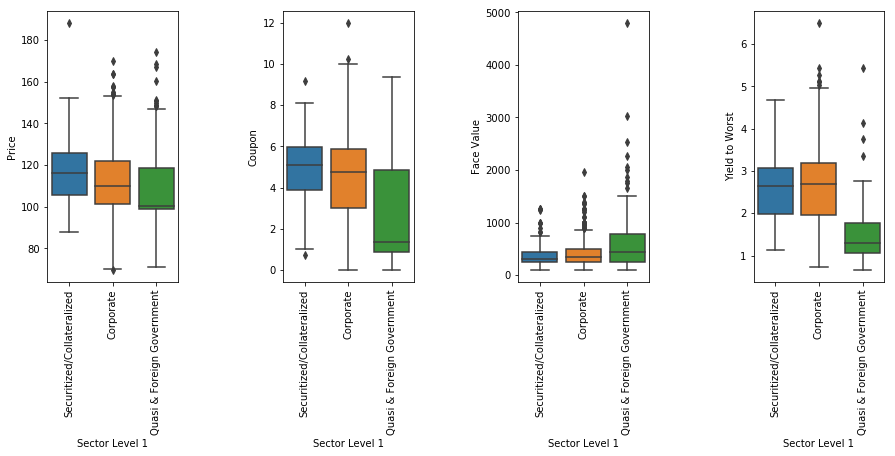

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
fig.subplots_adjust(wspace=0.8)
p1=sns.boxplot(data=df_clean, x='Sector Level 1', y='Price', ax = axes[0])
p2=sns.boxplot(data=df_clean, x='Sector Level 1', y='Coupon', ax = axes[1])
p3=sns.boxplot(data=df_clean, x='Sector Level 1', y='Face Value', ax = axes[2])
p4=sns.boxplot(data=df_clean, x='Sector Level 1', y='Yield to Worst', ax = axes[3])

p1.set_xticklabels(p1.get_xticklabels(),rotation=90);
p2.set_xticklabels(p2.get_xticklabels(),rotation=90);
p3.set_xticklabels(p3.get_xticklabels(),rotation=90);
p4.set_xticklabels(p4.get_xticklabels(),rotation=90);

## separate numeric and non-numeric columns

In [99]:
numeric_cols = df_clean.select_dtypes([np.number]).columns
non_numeric_cols = [col for col in df_clean.columns if col not in numeric_cols and col not in ['Maturity','ISIN']]

In [100]:
non_numeric_cols

['Cusip',
 'Description',
 'Ticker',
 'Composite Rating',
 'Currency',
 'Country',
 'Sector Level 1',
 'Sector Level 2',
 'Sector Level 3',
 'Sector Level 4',
 'Type']

In [62]:
numeric_cols

Index(['Coupon', 'Face Value', 'Price', 'Accrued Interest',
       'Duration To Worst', 'Yield to Worst', 'Effective Duration',
       'Effective Yield', 'OAS vs Govt', 'Prior Month-End Price',
       'Prior Month-End Accrued Interest', 'Prior Month-End % Weight',
       'Prior Month-End Duration To Worst', 'Prior Month-End Yield To Worst',
       'Prior Month-End Effective Duration', 'Prior Month-End Effective Yield',
       'Prior Month-End OAS vs Govt', 'TRR % MTD LOC', 'Excess Rtn % MTD',
       'Asset Swap Spread', 'Prior Month-End Asset Swap Spread',
       'OAS vs Swap ', 'Prior Month-End OAS vs Swap', 'years_to_maturity'],
      dtype='object')

## Correlation heatmap of features

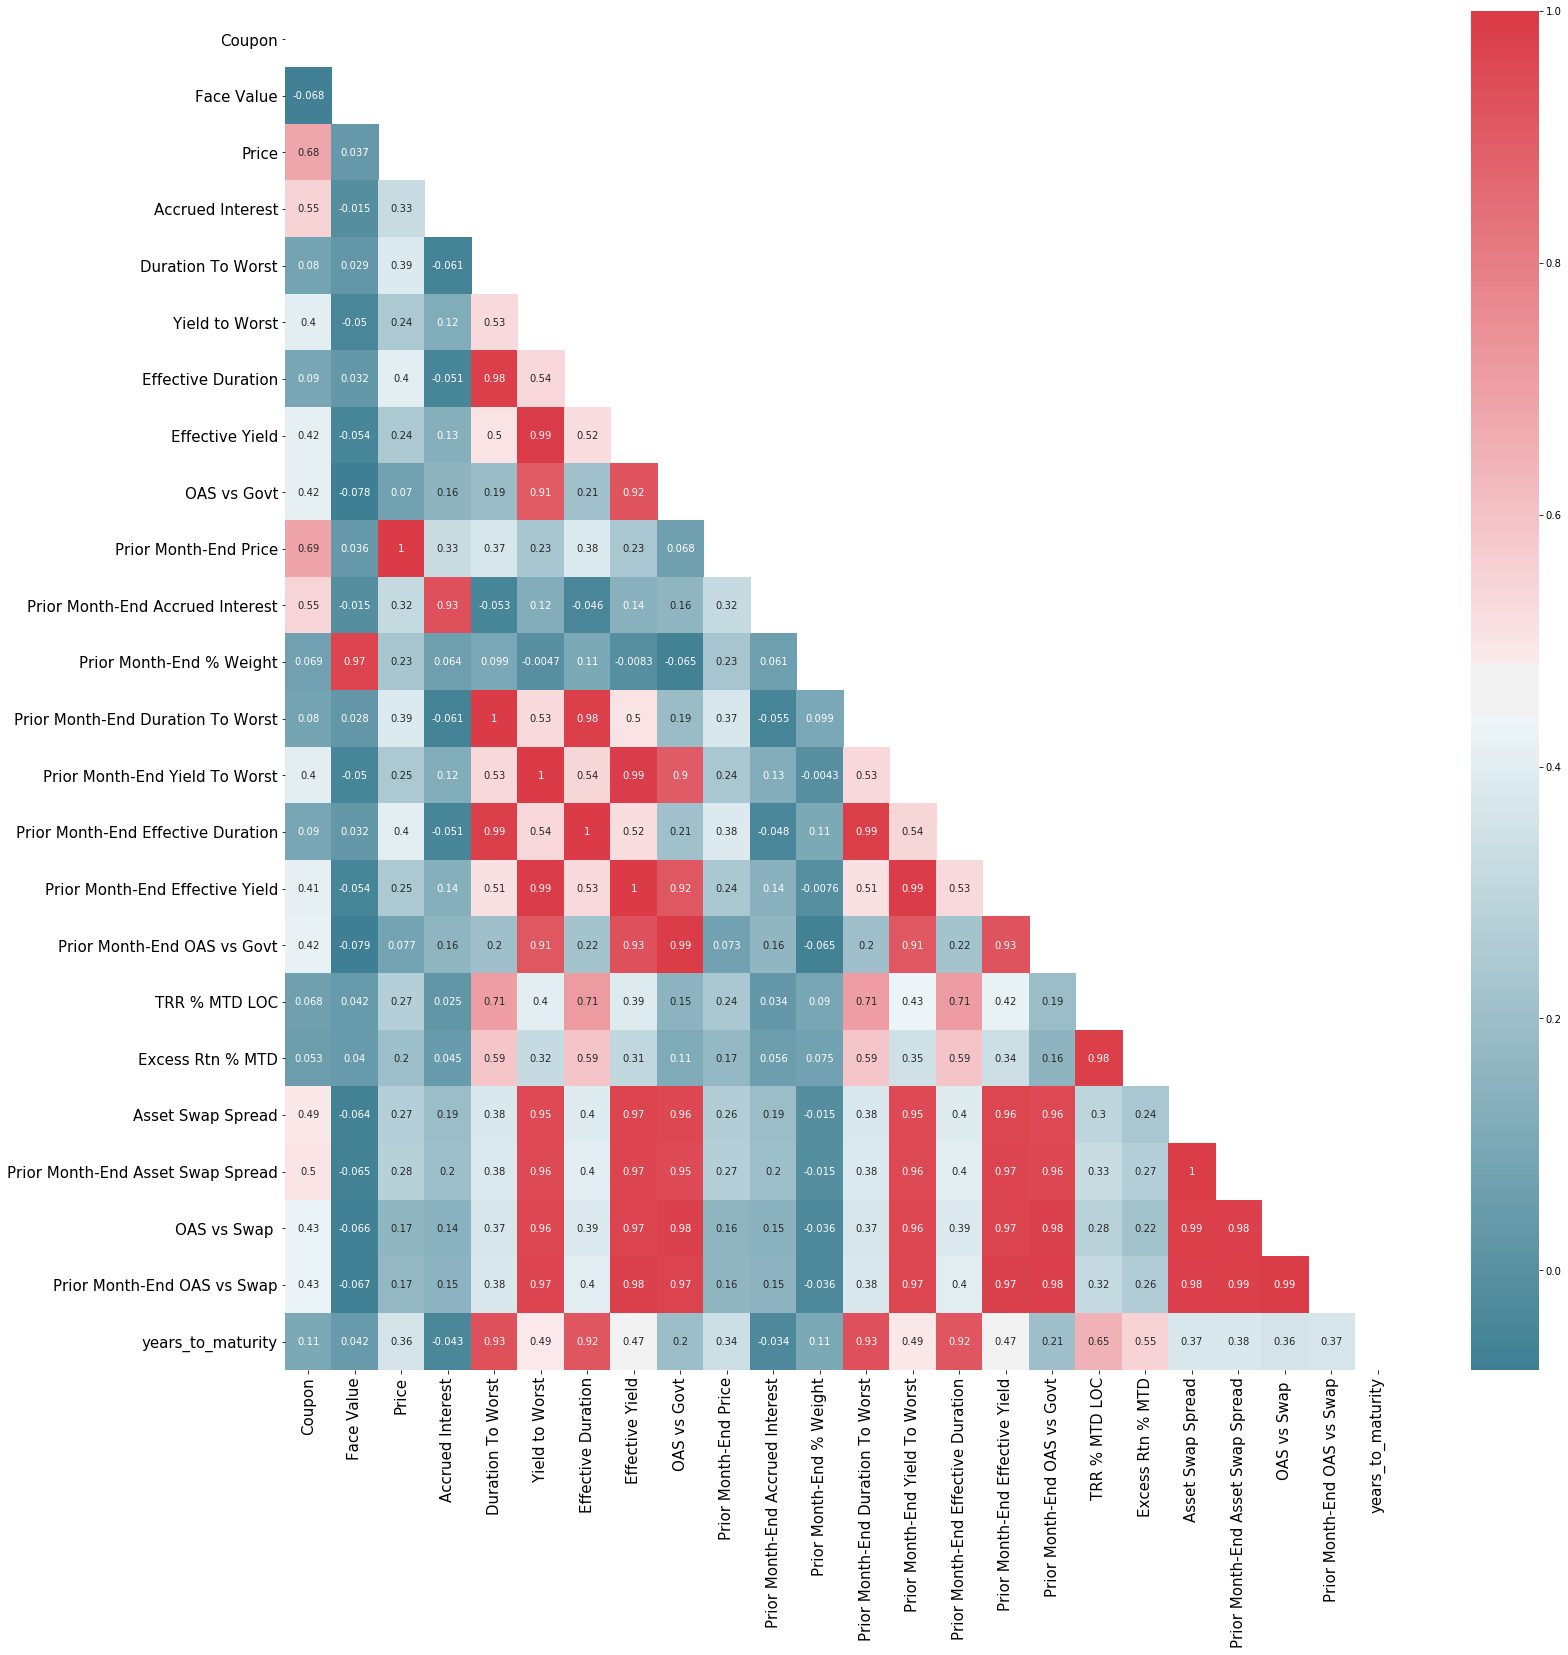

In [67]:
#Using Pearson Correlation
corr = df_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(25,25))
sns.heatmap(corr,  mask=mask, annot=True, cmap=cmap)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Modelling

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [79]:
scaler = StandardScaler()
X = df_clean[numeric_cols].values
Xscaled = scaler.fit_transform(X)

In [87]:
# Perform PCA analysis with 2 components
pca = PCA(n_components=2)
pca.fit(Xscaled)
Xpca = pca.transform(Xscaled)

In [88]:
# how much of the variance explained by the two first components
ex_vars = pca.explained_variance_ratio_
print(ex_vars)
print("total variance explained %f" % (sum(ex_vars)))

[ 0.49591697  0.19150402]
total variance explained 0.687421


In [91]:
# transformed values shape
Xpca.shape

(1147, 2)

In [92]:
pdf = pd.DataFrame(data = Xpca, columns = ['p1', 'p2'])
finalDf = pd.concat([pdf, df_clean[non_numeric_cols]], axis = 1)

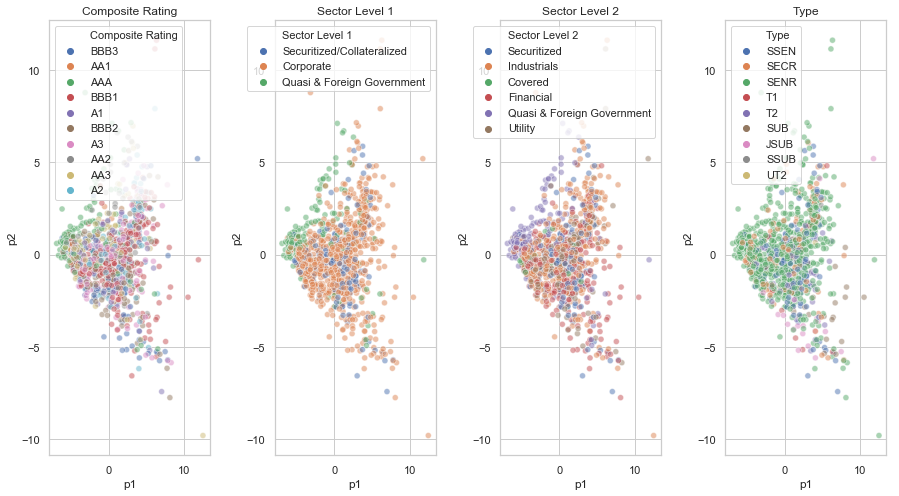

In [396]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
small_cat_columns = [col for col in non_numeric_cols if 1<len(df_clean[col].unique())<=22]
for i in range(0, len(small_cat_columns)):
    ax = fig.add_subplot(1, 4, i+1)
    ax.set_title(small_cat_columns[i])
    sns.scatterplot(data=finalDf, x='p1',y='p2',hue=small_cat_columns[i], alpha=0.5)

## Modelling - Regression

In [128]:
df_clean['Composite Rating'].unique()

array(['BBB3', 'AA1', 'AAA', 'BBB1', 'A1', 'BBB2', 'A3', 'AA2', 'AA3', 'A2'], dtype=object)

In [155]:
# hot code encode categorical variables
onehot_df = pd.get_dummies(df_clean[['Sector Level 1','Sector Level 2','Sector Level 3','Composite Rating']])
onehot_cols = onehot_df.columns.tolist()


model_df = pd.concat([df_clean[numeric_cols], onehot_df[onehot_cols]],axis=1)

In [224]:
X = model_df.drop(['Price','Prior Month-End Price'],axis=1).values
y = model_df['Price'].values

In [226]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [248]:
kf = KFold(n_splits=5)

In [399]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regr = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=6, min_samples_leaf=1, min_samples_split=2)

# parameters = {'max_depth':[4,5,6],'min_samples_leaf':[2,3,4], 'n_estimators':[100,200,500], 'min_samples_split':[2,3,4]}
# clf = GridSearchCV(regr, parameters, cv=kf, n_jobs=-1, verbose=True)

In [400]:
regr.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [401]:
scores = cross_val_score(regr, X_train, y_train.ravel(), cv=kf)

In [403]:
print("Training mean score %f: +-  %f" % (scores.mean(), scores.std()))

Training mean score 0.886462: +-  0.038345


In [404]:
clf.best_estimator_.fit(X_train, y_train.ravel())
clf.score(X_test, y_test)

0.92960229796412874

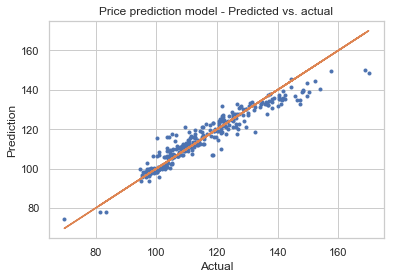

In [408]:
plt.plot(y_test,regr.predict(X_test),'.');
plt.plot(y_test,y_test,'-');
plt.title('Price prediction model - Predicted vs. actual')
plt.ylabel('Prediction');
plt.xlabel('Actual');

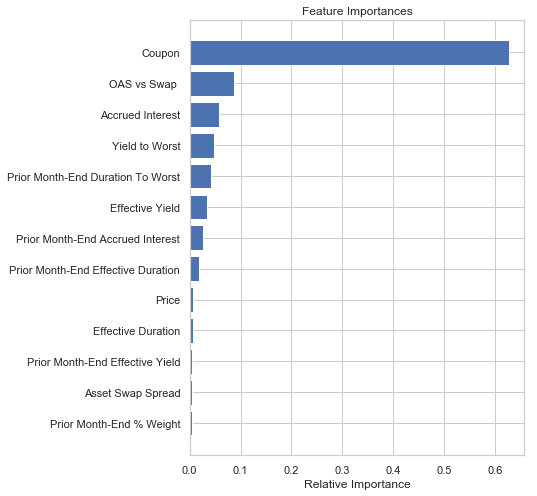

In [394]:
# model feature importance

features = model_df.columns
importances = regr.feature_importances_
indices = np.argsort(importances)

indices_red = [ind for ind in indices if importances[ind]>0.005]

plt.figure(figsize=(6,8))
plt.title('Feature Importances')
plt.barh(range(len(indices_red)), importances[indices_red], color='b', align='center')
plt.yticks(range(len(indices_red)), [features[i] for i in indices_red])
plt.xlabel('Relative Importance')
plt.show()

## Explore groups in different sectors according to their composite rating

In [413]:
level1 = df_clean.groupby(['Composite Rating','Sector Level 1'])\
                 .size().unstack().fillna(0)

In [416]:
level2 = df_clean.groupby(['Composite Rating','Sector Level 2'])\
                 .size().unstack().fillna(0)

In [419]:
level3 = df_clean.groupby(['Composite Rating','Sector Level 3'])\
                 .size().unstack().fillna(0)

In [420]:
level4 = df_clean.groupby(['Composite Rating','Sector Level 4'])\
                 .size().unstack().fillna(0)

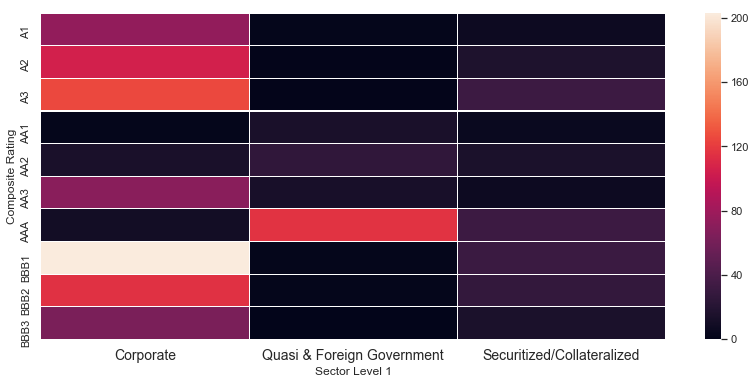

In [440]:
plt.figure(figsize=(14,6))
sns.heatmap(data = level1, xticklabels=True, yticklabels=True, cmap=cmap, 
            linewidths=0.04)
plt.xticks(fontsize=14);

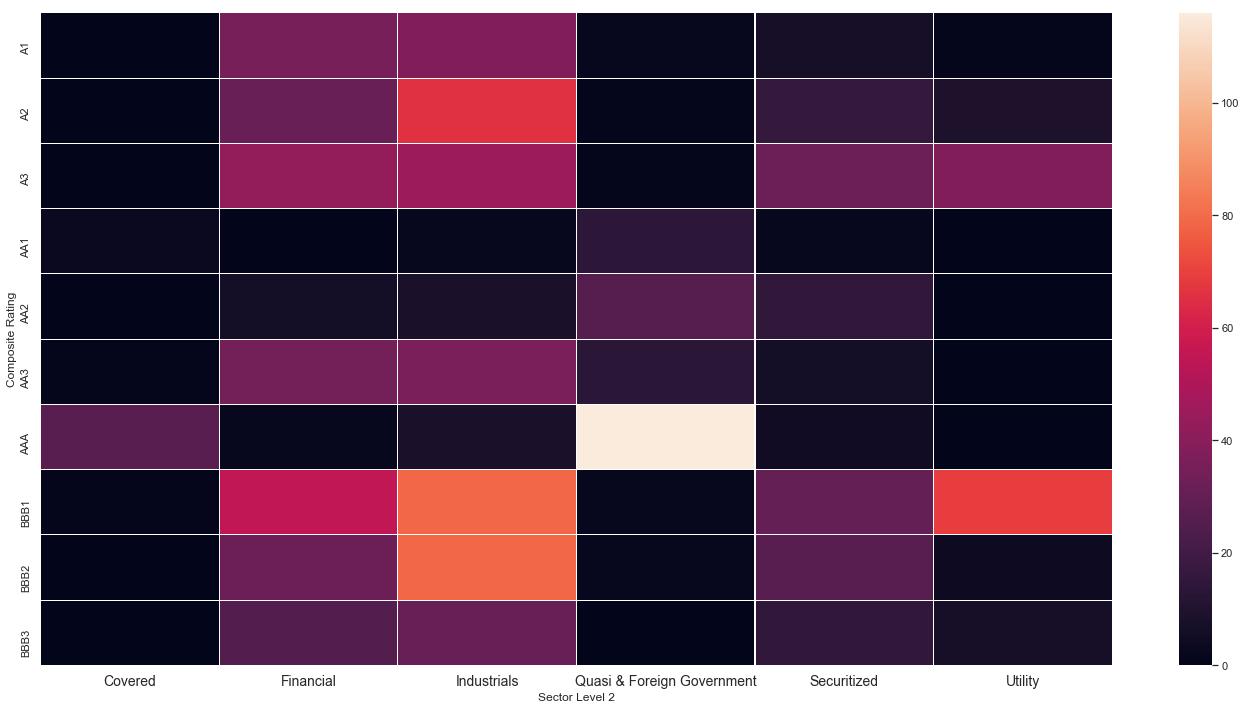

In [439]:
plt.figure(figsize=(24,12))
sns.heatmap(data = level2, xticklabels=True, yticklabels=True, cmap=cmap, 
            linewidths=0.04)
plt.xticks(fontsize=14);

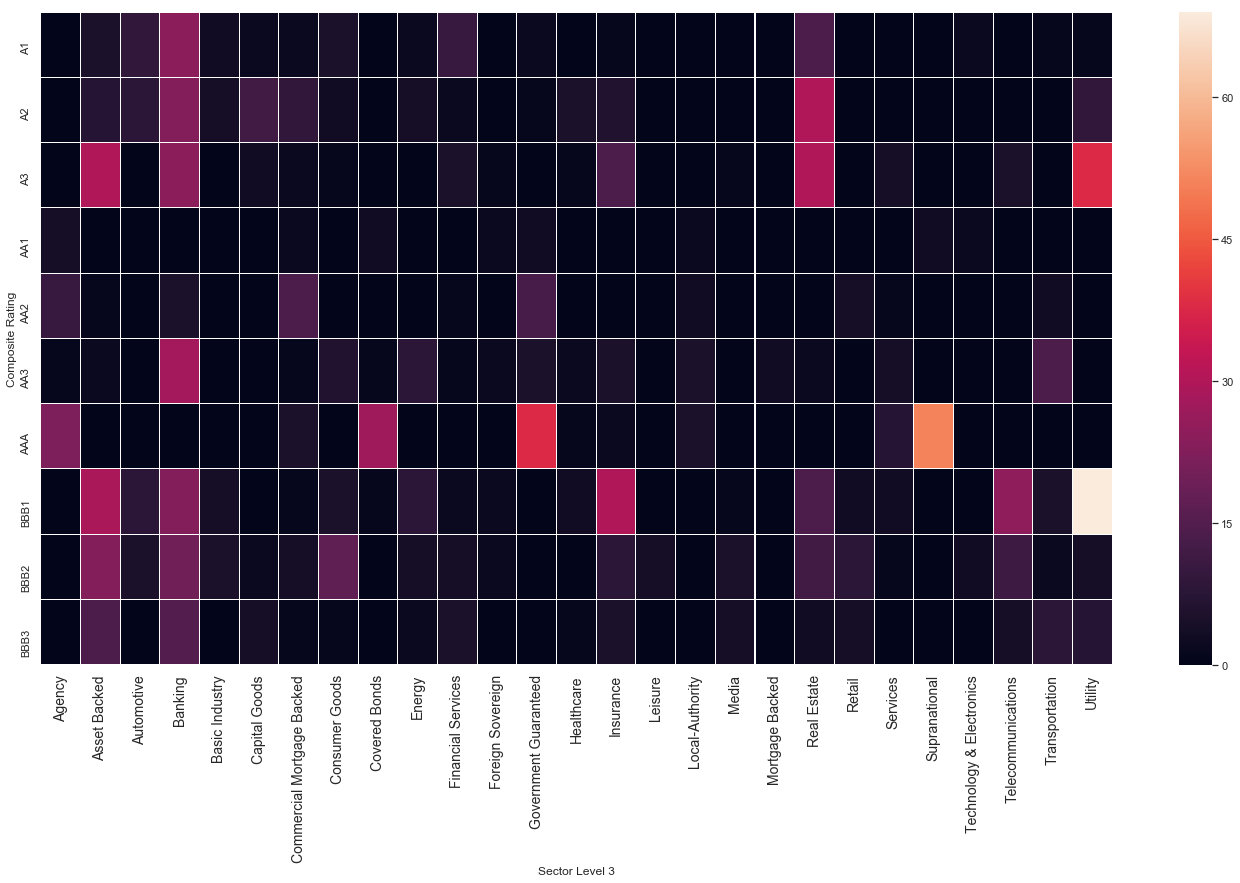

In [438]:
plt.figure(figsize=(24,12))
sns.heatmap(data = level3, xticklabels=True, yticklabels=True, cmap=cmap, 
            linewidths=0.04)
plt.xticks(fontsize=14);

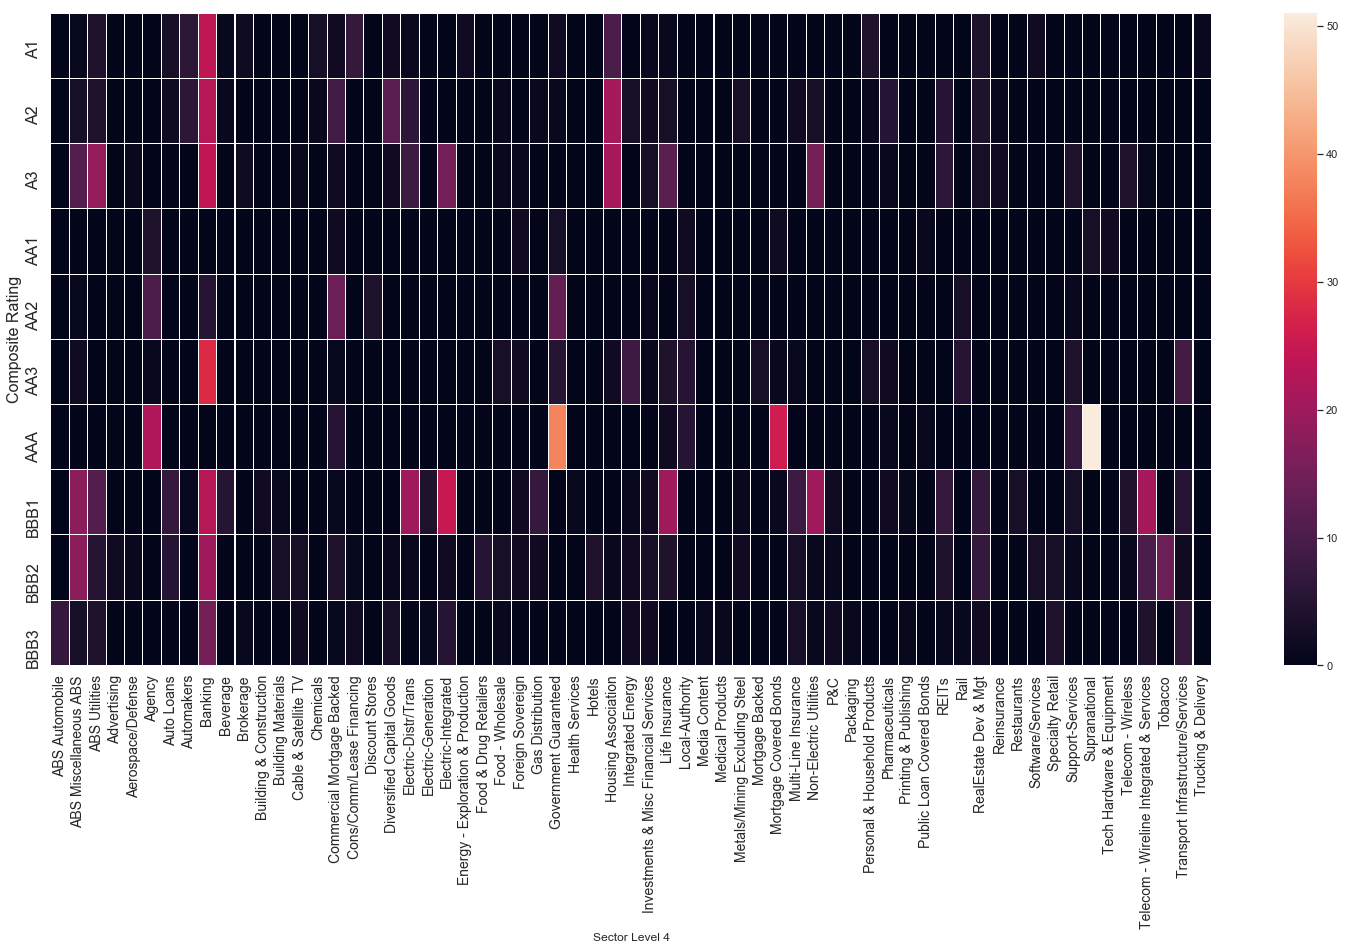

In [437]:
plt.figure(figsize=(26,12))
sns.heatmap(data = level4, xticklabels=True, 
            yticklabels=True, cmap=cmap, linewidths=0.04)
plt.xticks(fontsize=14);
plt.yticks(fontsize=16);
plt.ylabel('Composite Rating',fontsize=16);